In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [13]:
df = pd.read_excel('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/staging-paramaters/pooled_5020.xlsx')

df

,Vile_Code,Ratio,Age of flies,staging time,Net Loss,Total Pupae
0,MON_PM_1,50:20,7,5h,0,186
1,MON_PM_2,50:20,7,4h,0,171
2,MON_PM_3,50:20,7,3h,0,46
3,TUE_AM_1,50:20,6,5h,0,229
4,TUE_AM_2,50:20,6,4h,0,137
...,...,...,...,...,...,...
180,TUE_AM_8,50:20,9,3h,2,111
181,TUE_AM_9,50:20,9,3h,1,215
182,WED_AM_6,50:20,8,3h,1,90
183,WED_AM_7,50:20,8,3h,3,150


/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_59925/2014791424.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Age of flies ', y='Total Pupae', hue='staging time', edgecolor='black', ci='sd', palette='Blues')


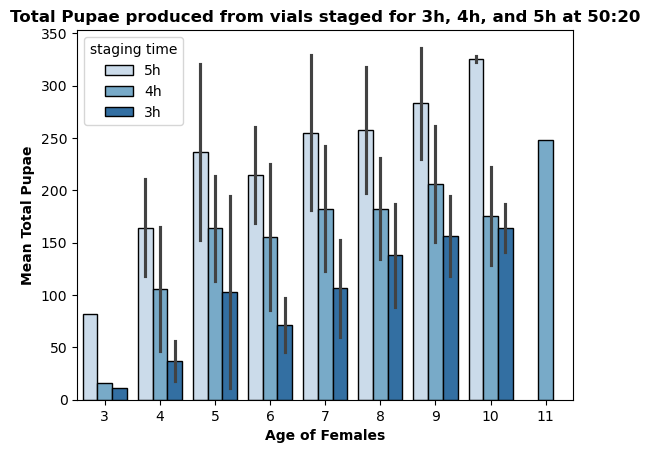

In [8]:
sns.barplot(data=df, x='Age of flies ', y='Total Pupae', hue='staging time', edgecolor='black', ci='sd', palette='Blues')

plt.title('Total Pupae produced from vials staged for 3h, 4h, and 5h at 50:20', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Mean Total Pupae', fontweight='bold')


plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/pooled_staging(5020).png', dpi=300, bbox_inches='tight')

plt.show()

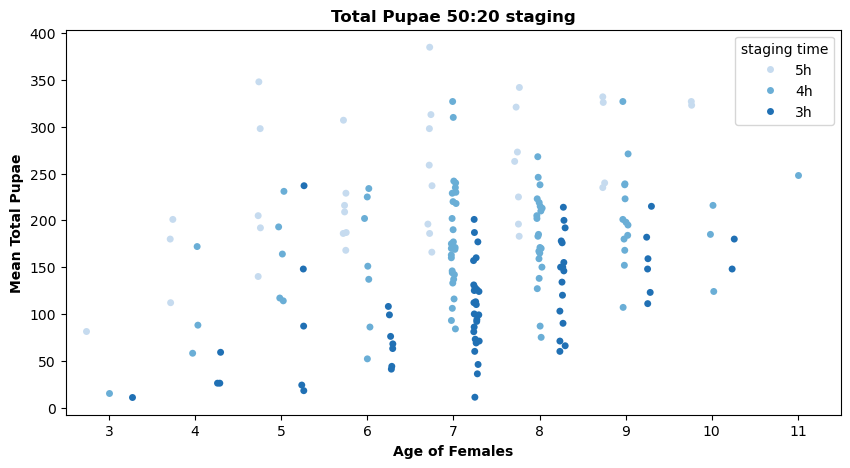

In [5]:
plt.figure(figsize=(10, 5))

sns.stripplot(data=df, x='Age of flies ', y='Total Pupae',hue='staging time', dodge=True, palette='Blues', jitter=True)

plt.title('Total Pupae 50:20 staging', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Mean Total Pupae', fontweight='bold')

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/pooled_staging(5020)_stripplot.png', dpi=300, bbox_inches='tight')

plt.show()

/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_59925/2566051435.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


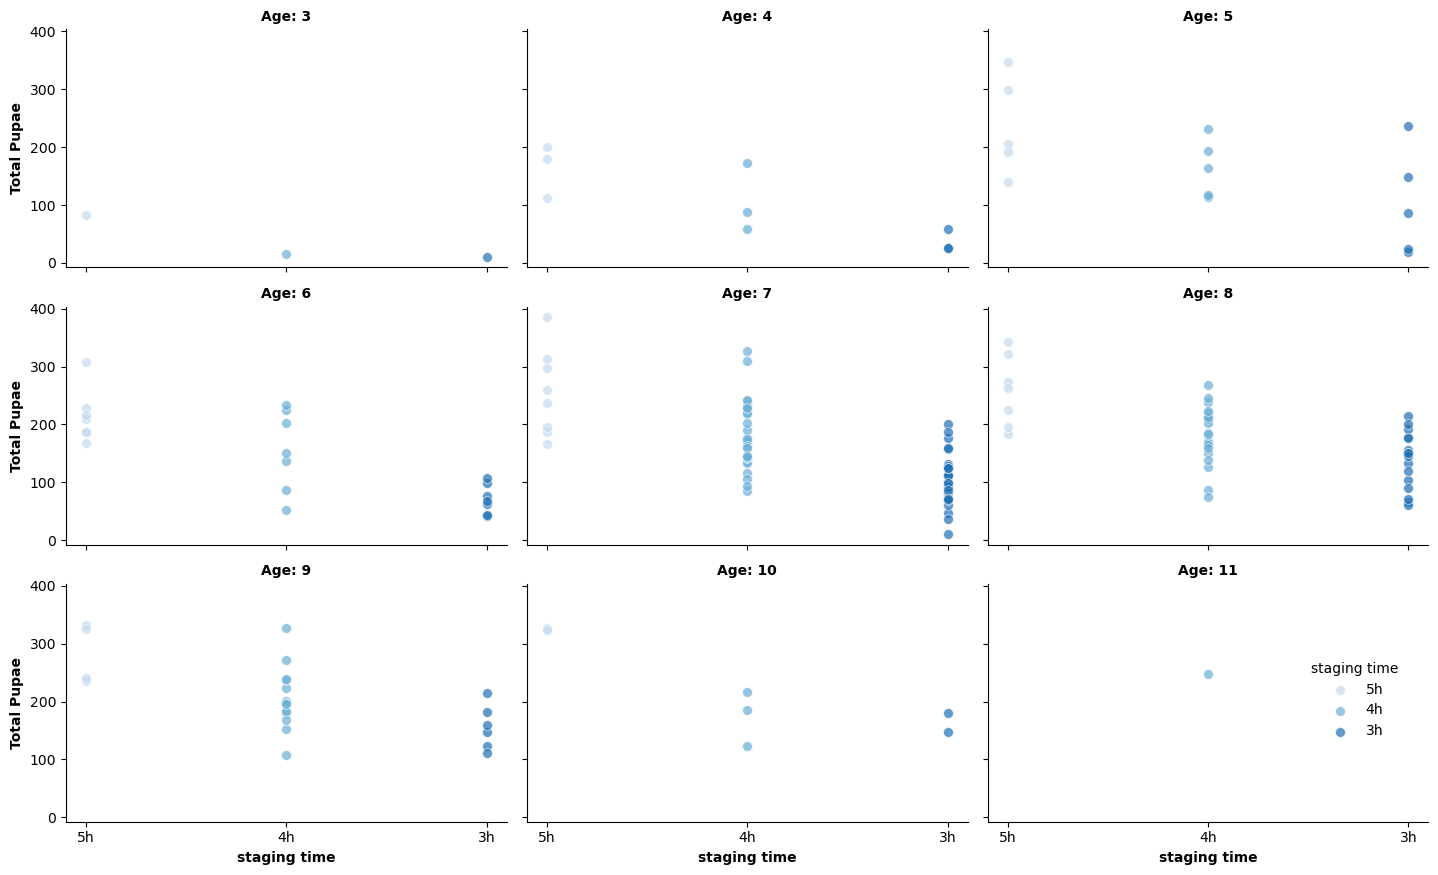

In [9]:


# Create a FacetGrid to make subplots for each 'Age of flies' horizontally
g = sns.FacetGrid(df, col='Age of flies ', hue='staging time', col_wrap=3, margin_titles=True, aspect=1.5, palette='Blues')

# Map a scatter plot to the FacetGrid
g.map(sns.scatterplot, 'staging time', 'Total Pupae', s=50, alpha=0.7)

# Add a legend
g.add_legend(title='staging time', bbox_to_anchor=(0.9, 0.2), loc='center left')

# Set the axis labels for each subplot
g.set_axis_labels('staging time', 'Total Pupae', fontweight='bold')

# Set the titles for each subplot
g.set_titles(col_template="Age: {col_name}", fontweight='bold')

# Add a main title
plt.subplots_adjust(top=0.85)  # Adjust the top to make space for suptitle if necessary
g.fig.suptitle('', fontsize=16, fontweight='bold')

plt.tight_layout()

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/pooled_staged_subplot_age.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_59925/3567021766.py:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


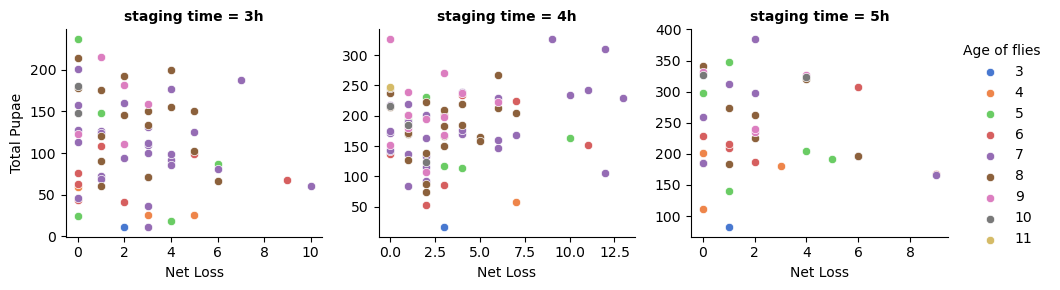

In [10]:
# convert to catagorical 


df['Net Loss'] = df['Net Loss'].astype(int)


df['staging time'] = df['staging time'].astype('category')
df['Age of flies '] = df['Age of flies '].astype('category')

# Create a FacetGrid for subplots based on 'staging time' and 'ratios' conditions
# 'col' and 'row' parameters could be adjusted based on your specific conditions.
g = sns.FacetGrid(df, col='staging time', hue='Age of flies ', col_wrap=5, sharex=False, sharey=False, palette='muted')

# Map a scatter plot to the FacetGrid
g.map(sns.scatterplot, 'Net Loss', 'Total Pupae')

# Add a legend

g.add_legend(title='Age of flies ', bbox_to_anchor=(0.6, 0.5), loc='center left')



# Set the axis labels
g.set_axis_labels('Net Loss', 'Total Pupae')

# Adjust the subplot titles if necessary
g.set_titles(col_template="{col_name}")
g.set_titles(row_template='{row_name}', fontweight='bold')

plt.tight_layout()

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/pooled_staged_subplot_stagetime.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()

/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_59925/3478818993.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


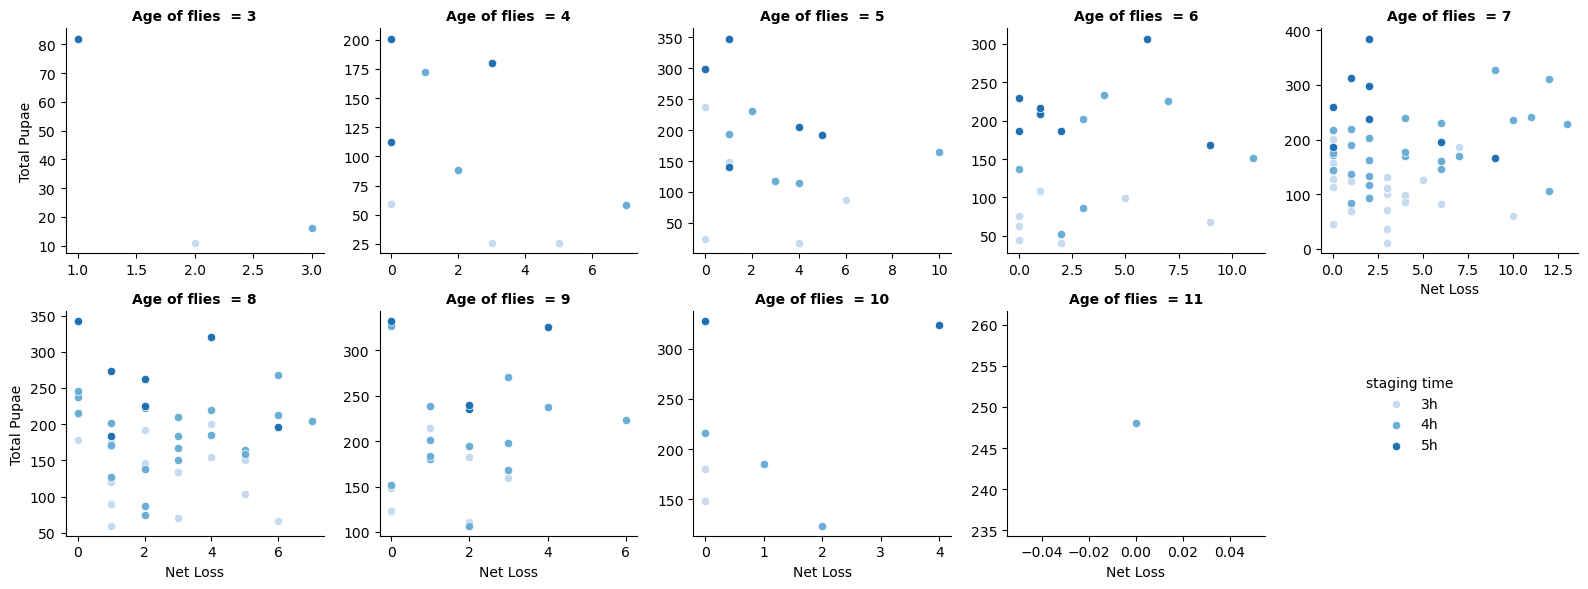

In [11]:
df['Net Loss'] = df['Net Loss'].astype(int)


df['staging time'] = df['staging time'].astype('category')
df['Age of flies '] = df['Age of flies '].astype('category')

# Create a FacetGrid for subplots based on 'staging time' and 'ratios' conditions
# 'col' and 'row' parameters could be adjusted based on your specific conditions.
g = sns.FacetGrid(df, col='Age of flies ', hue='staging time', col_wrap=5, sharex=False, sharey=False, palette='Blues')

# Map a scatter plot to the FacetGrid
g.map(sns.scatterplot, 'Net Loss', 'Total Pupae')

# Add a legend

g.add_legend(title='staging time', bbox_to_anchor=(0.85, 0.3), loc='center left')



# Set the axis labels
g.set_axis_labels('Net Loss', 'Total Pupae')

# Adjust the subplot titles if necessary
g.set_titles(col_template="{col_name}")
g.set_titles(row_template='{row_name}', fontweight='bold')

plt.tight_layout()

plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/pooled_netloss_pupa_subplot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

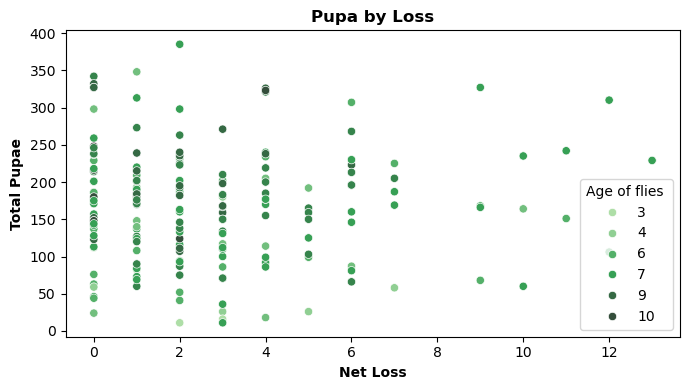

In [20]:
plt.figure(figsize=(7, 4))

sns.scatterplot(data=df, x='Net Loss', y='Total Pupae', hue='Age of flies ', palette='Greens_d')

plt.title('Pupa by Loss', fontweight='bold')
plt.xlabel('Net Loss', fontweight='bold')
plt.ylabel('Total Pupae', fontweight='bold')

plt.tight_layout()
plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/netloss_pupa_5020.png', dpi=300, bbox_inches='tight')

plt.show()

/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_59925/3850971634.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


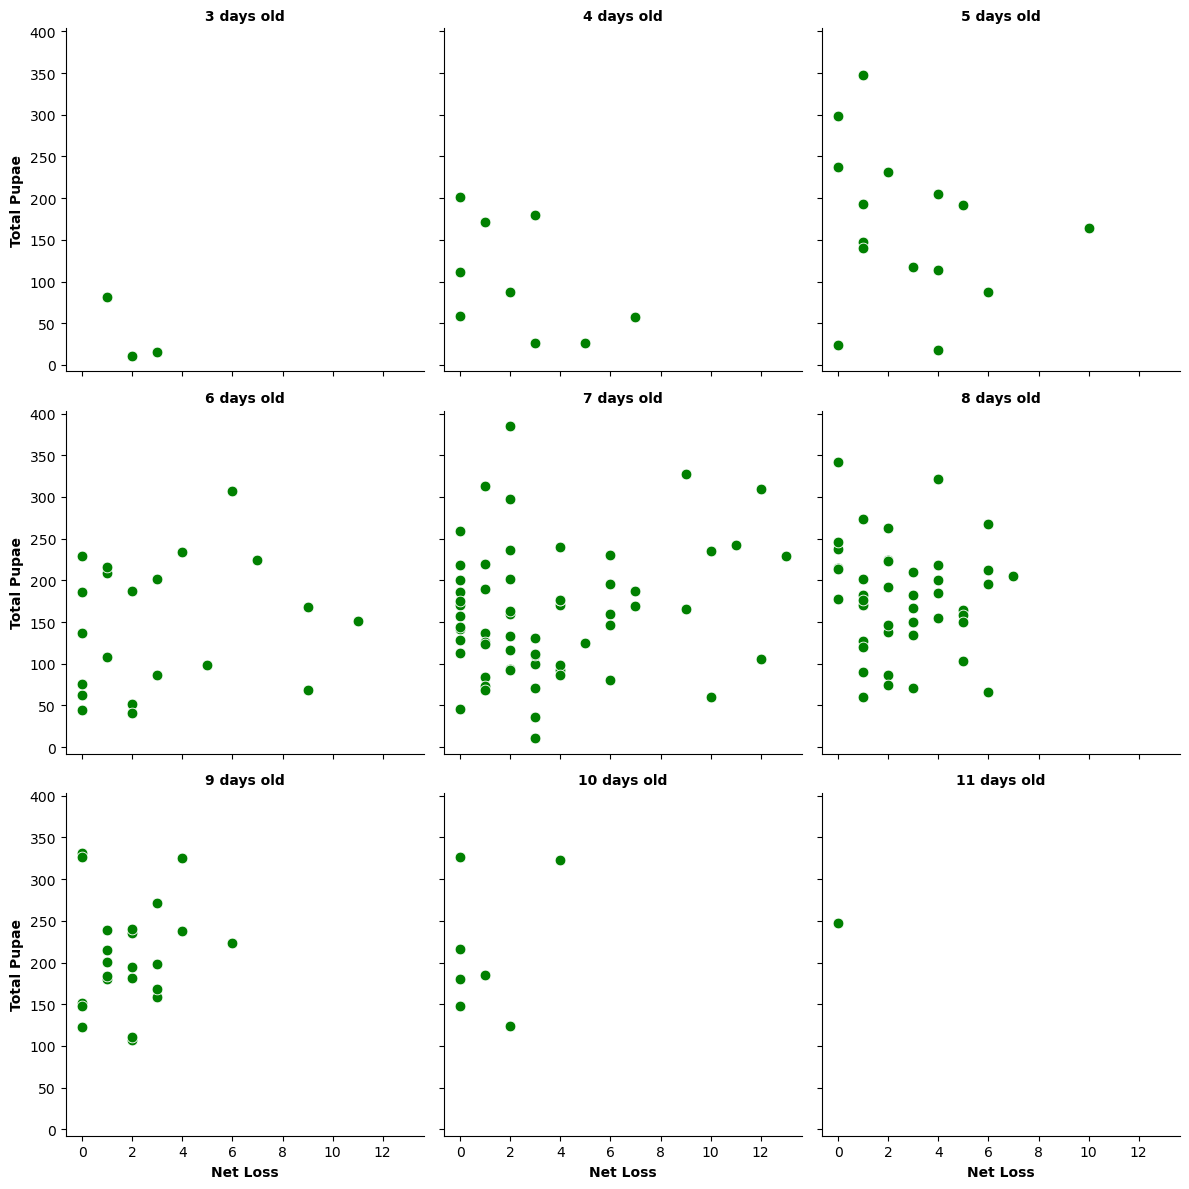

In [32]:


# Create a FacetGrid that creates a separate subplot for each unique value in the 'Age of flies' column
# The g variable is used as a convenient shorthand to refer to this FacetGrid object. 
g = sns.FacetGrid(df, col='Age of flies ', col_wrap=3, height=4, aspect=1)
g.map_dataframe(sns.scatterplot, x='Net Loss', y='Total Pupae', color='green', s=60)

# Adding titles and customizing axes for each subplot
g.set_titles('{col_name} days old', fontweight='bold')
g.set_axis_labels('Net Loss', 'Total Pupae', fontweight='bold')

# Adjust the layout
plt.tight_layout()

# Save the figure if needed
plt.savefig('/Users/cochral/repos/behavioural-analysis/plots/plug-camera/staging/netloss_pupa_5020_agesubplot.png', dpi=300)

# Show the plot
plt.show()